## House Price Prediction - Assignment 

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [104]:
# reading the dataset
train = pd.read_csv("train.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [105]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [106]:
# head
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [107]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
train['MSSubClass'].astype('category').value_counts()



20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [108]:
#Exterior1st

train['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [109]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
train['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

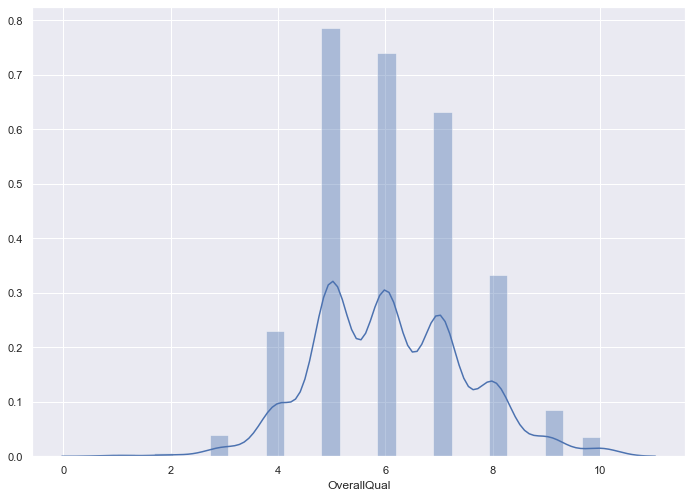

In [110]:
# curbweight: weight of car without occupants or baggage
sns.distplot(train['OverallQual'])
plt.show()

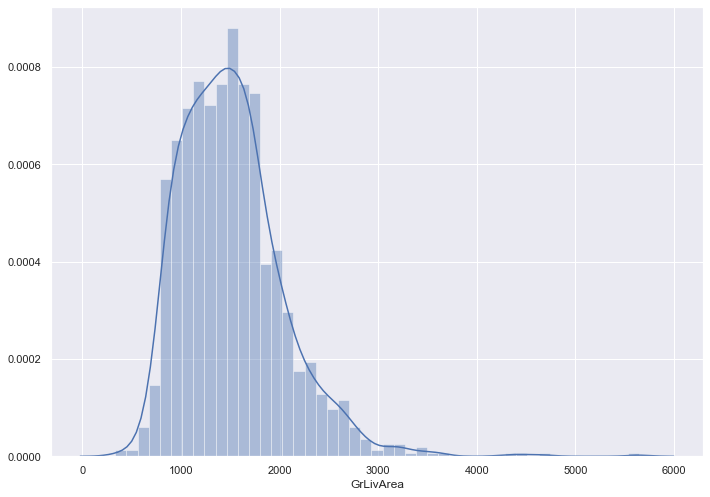

In [111]:
# GrLivArea:
sns.distplot(train['GrLivArea'])
plt.show()

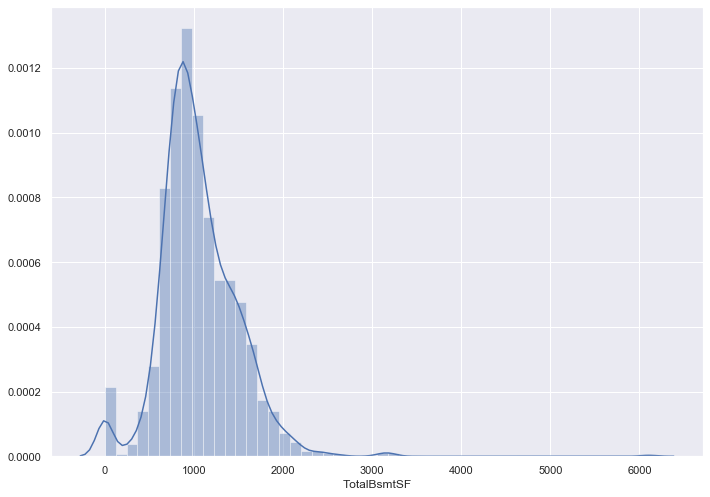

In [112]:
# TotalBsmtSF
sns.distplot(train['TotalBsmtSF'])
plt.show()

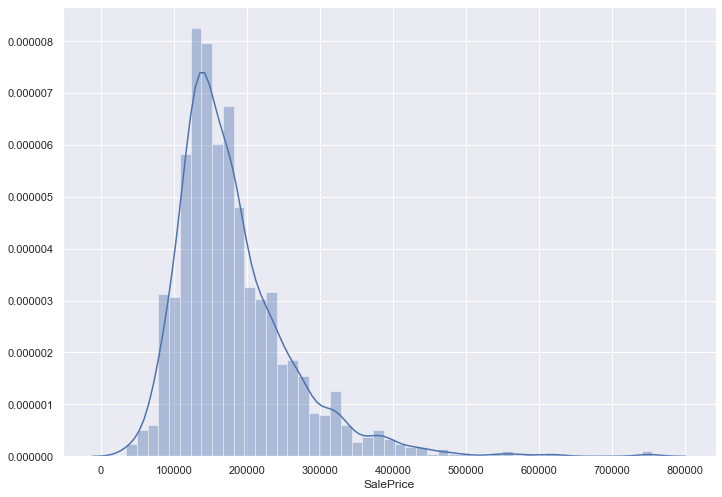

In [113]:
# The response variable; SalePrice
sns.distplot(train['SalePrice'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [114]:
# all numeric (float and int) variables in the dataset
train_numeric = train.select_dtypes(include=['float64', 'int64'])
train_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Here, although the variable ```MSSubClass``` is numeric (int), we'd rather treat it as categorical since it has only 15 discrete values. 

In [115]:
# dropping symboling and car_ID 
train_numeric = train_numeric.drop(['MSSubClass'], axis=1)
train_numeric.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Let's now make a pairwise scatter plot and observe linear relationships.

<Figure size 1440x720 with 0 Axes>

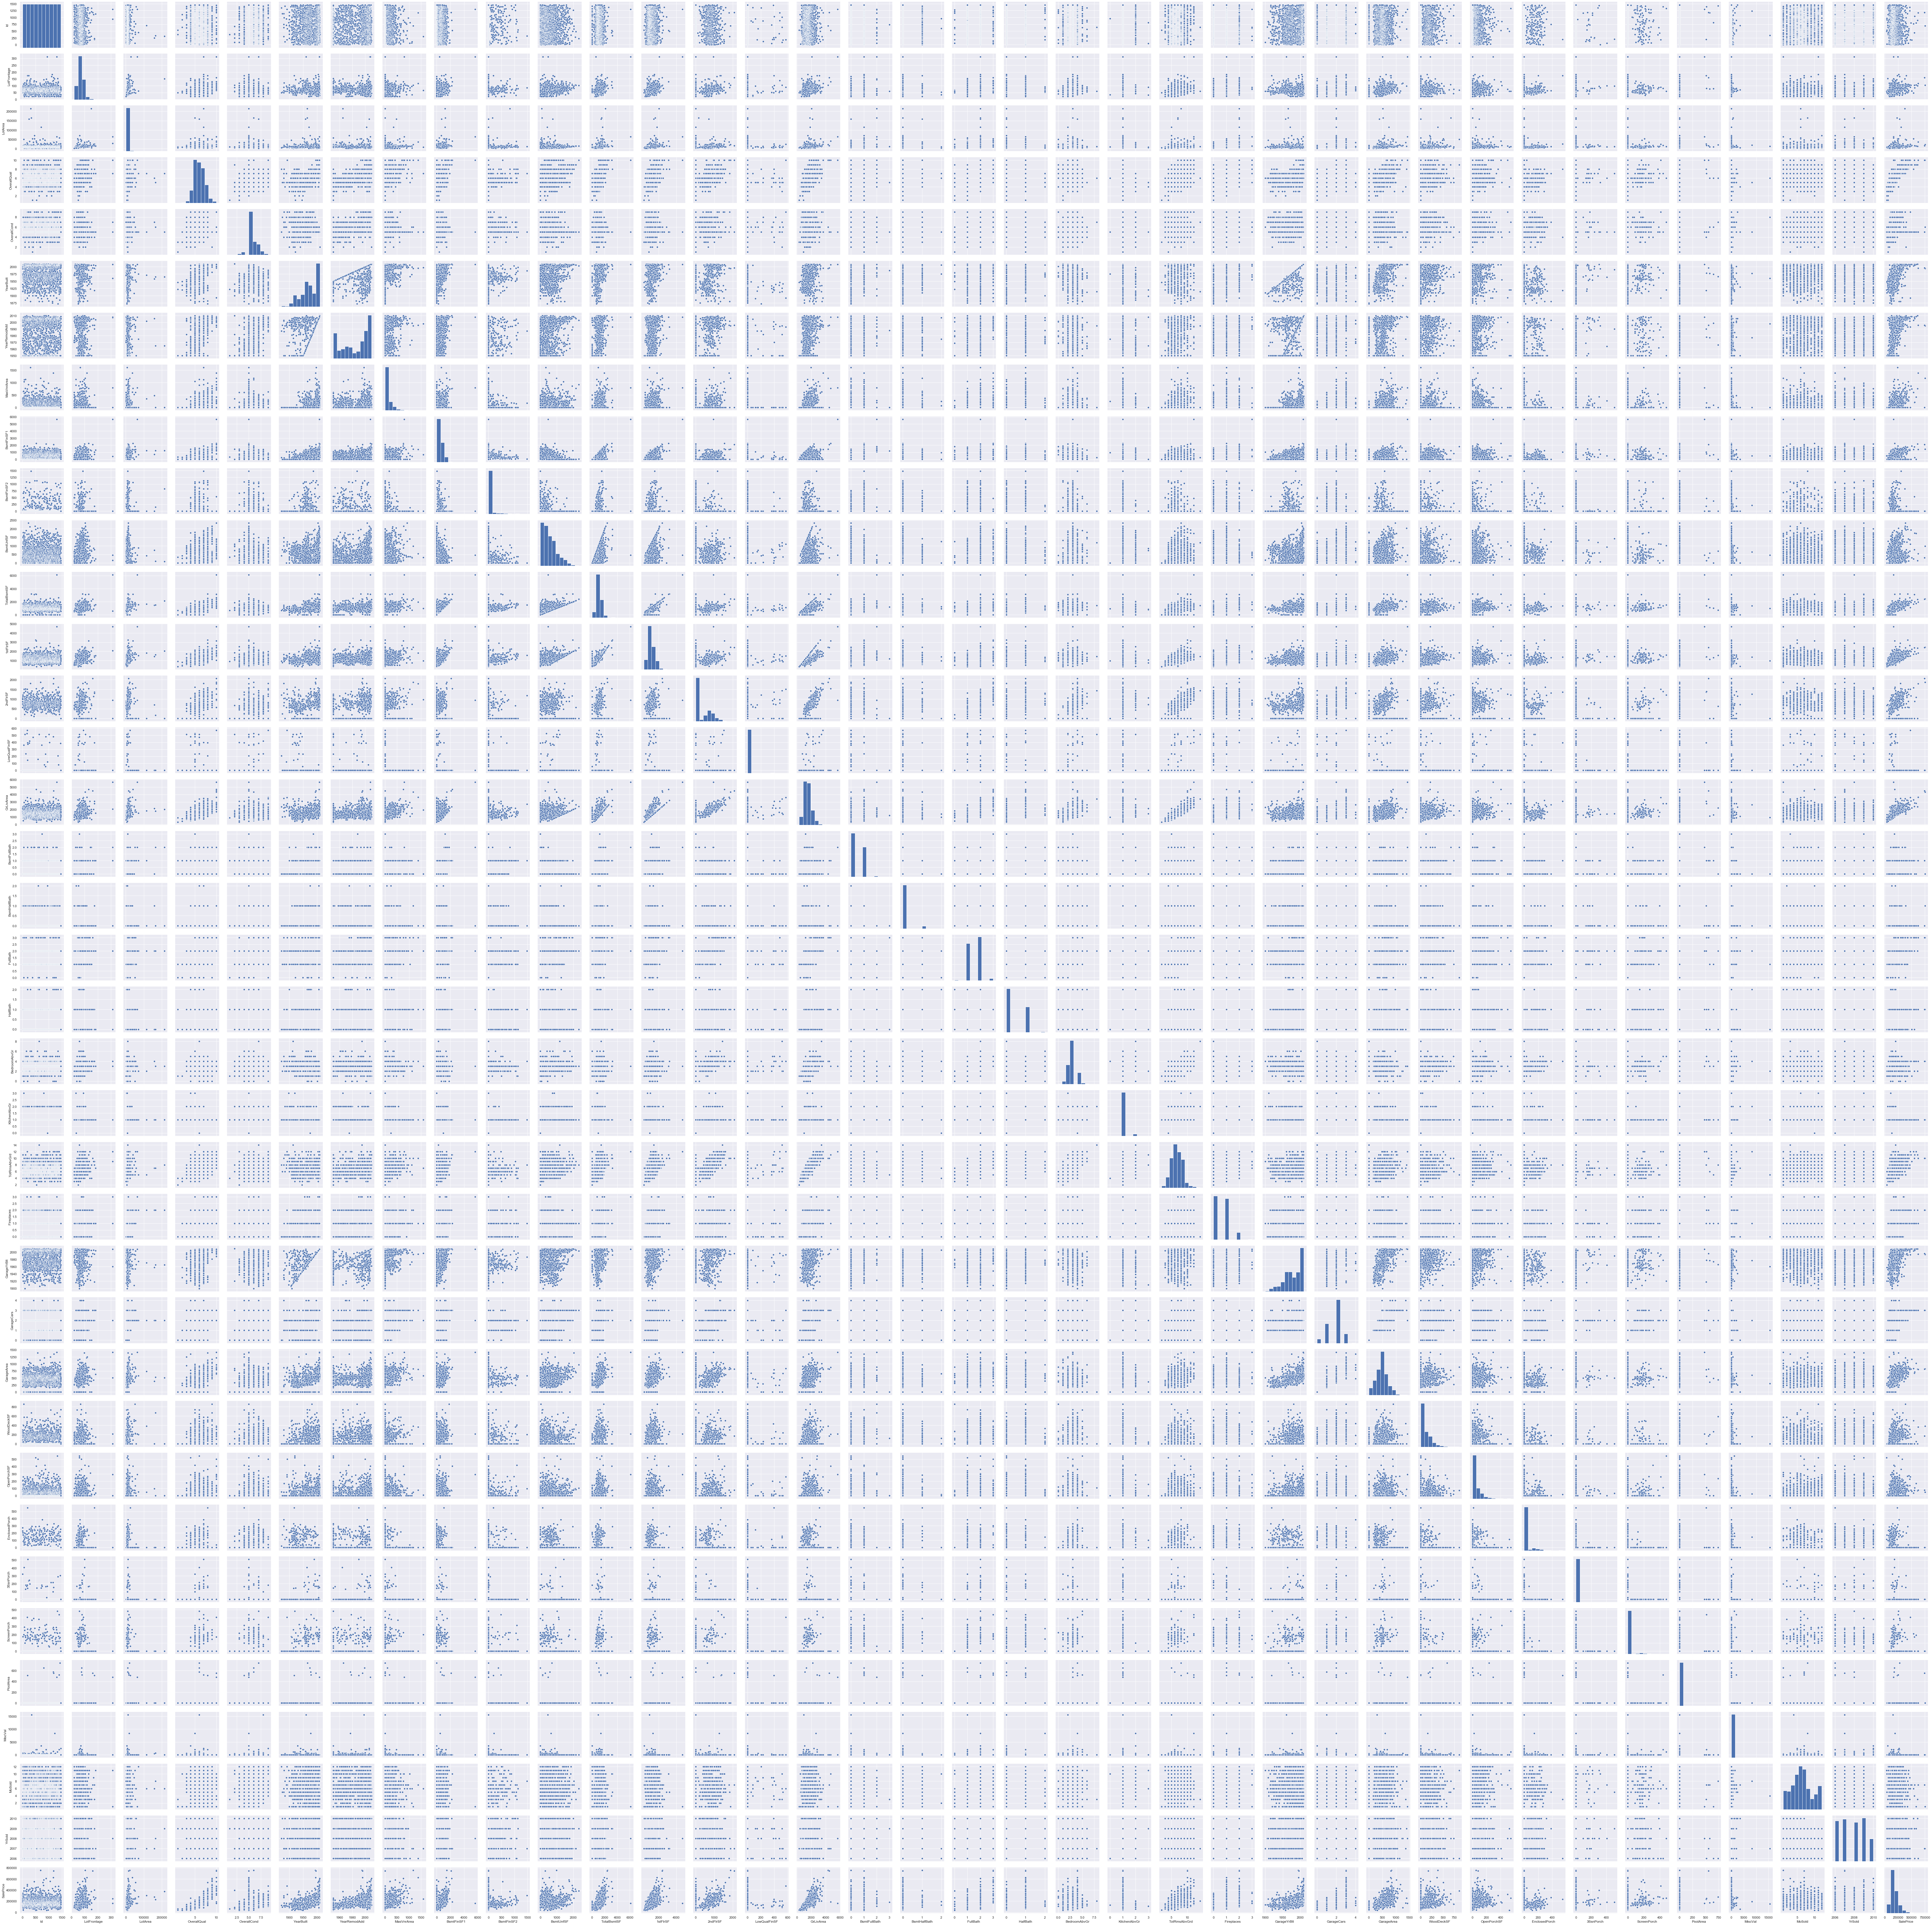

In [14]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(train_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [15]:
# correlation matrix
cor = train_numeric.corr()
cor

Id  LotFrontage   LotArea  OverallQual  OverallCond  \
Id             1.000000    -0.010601 -0.033226    -0.028365     0.012609   
LotFrontage   -0.010601     1.000000  0.426095     0.251646    -0.059213   
LotArea       -0.033226     0.426095  1.000000     0.105806    -0.005636   
OverallQual   -0.028365     0.251646  0.105806     1.000000    -0.091932   
OverallCond    0.012609    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998     0.088866  0.013788     0.550684     0.073741   
MasVnrArea    -0.050298     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1    -0.005024     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230     0.038469  0.004779    -0.030429     0.025494   
GrLivArea      0.008273     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155    -0.007234  0.048046    -0.040150     0.117821   
FullBath       0.005587     0.198769  0.126031     0.550600    -0.194149   
HalfBath       0.006784     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239     0.352096  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt    0.000072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars     0.016570     0.285691  0.154871     0.600671    -0.185758   
GarageArea     0.017634     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635     0.070029  0.020423     0.030371     0.025504   
ScreenPorch    0.001330     0.041383  0.043160     0.064886     0.054811   
PoolArea       0.057044     0.206167  0.077672     0.065166    -0.001985   
MiscVal       -0.006242     0.003368  0.038068    -0.031406     0.068777   
MoSold         0.021172     0.011200  0.001205     0.070815    -0.003511   
YrSold         0.000712     0.007450 -0.014261    -0.027347     0.043950   
SalePrice     -0.021917     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id             -0.012713     -0.021998   -0.050298   -0.005024   -0.005968   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.344501    0.445863    0.097117   
2ndFlrSF        0.010308      0.140024  

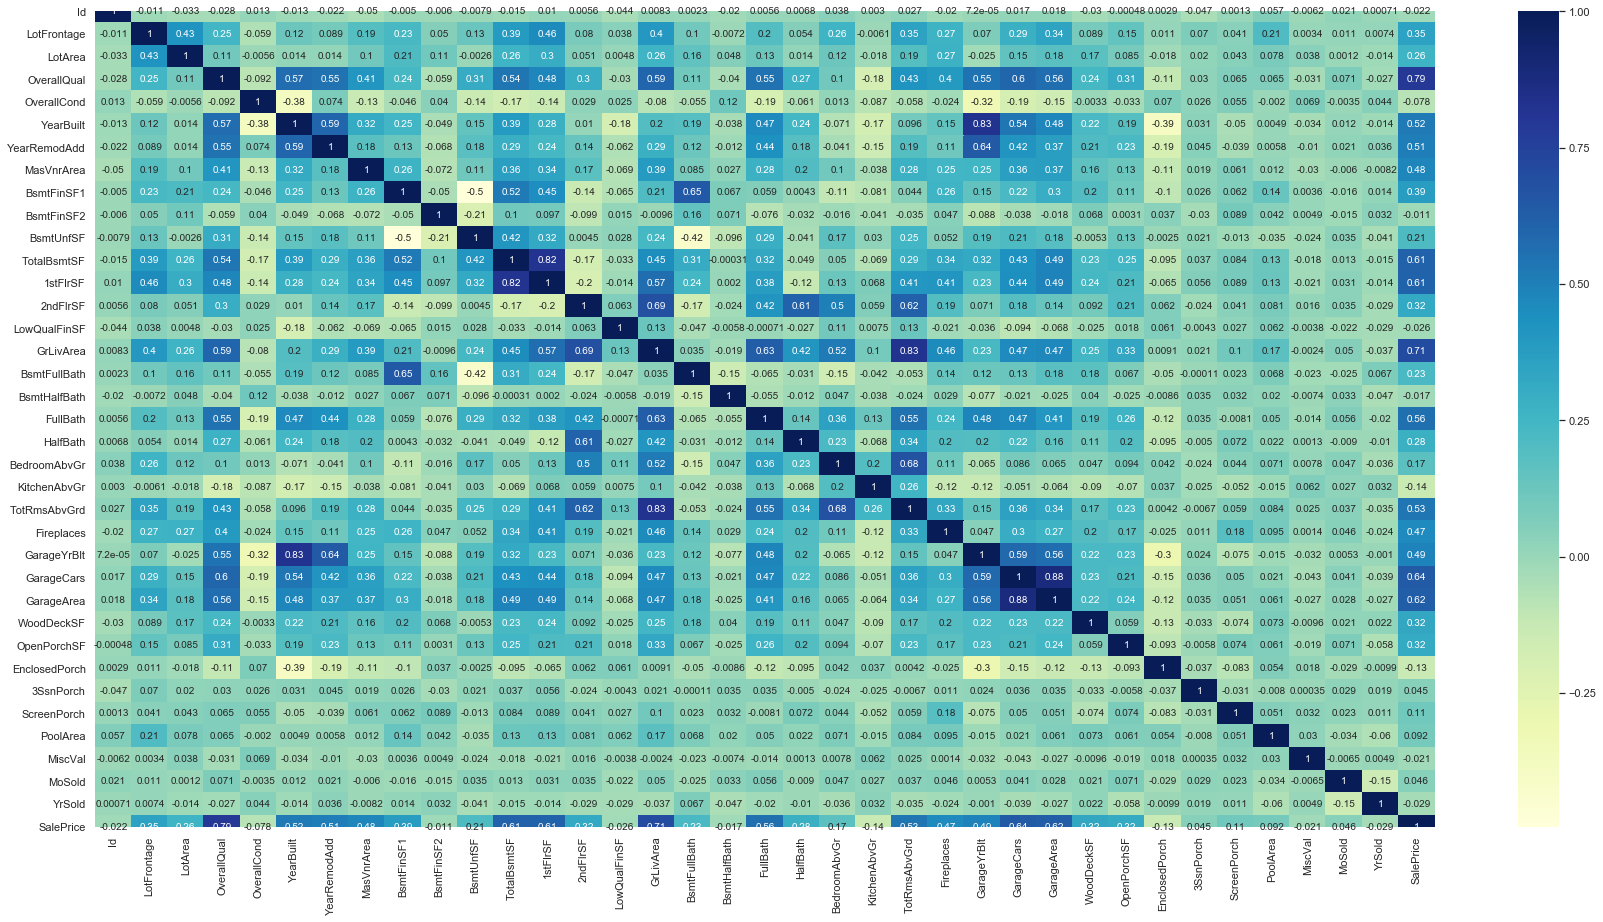

In [16]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
The relation between SalePrice and the two predictors with the highest correlation with SalePrice; Overall Quality (OverallQual) and the ‘Above Grade’ Living Area (GrLivArea)

Multicollinearity is an issue: the correlation between GarageCars and GarageArea is very high 0.89, and both have similar (high) correlations with SalePrice. The other 6 six variables with a correlation higher than 0.5 with SalePrice are: -TotalBsmtSF: Total square feet of basement area -1stFlrSF: First Floor square feet -FullBath: Full bathrooms above grade -TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) -YearBuilt: Original construction date -YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [116]:
# variable formats
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [59]:
#missing values
train.isnull().sum()/len(train)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [117]:
## drop columns having high missing values
train.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

In [118]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [119]:
#Dropping one of the columns which have two different or high correlated with salesprice
train.drop(['YearRemodAdd', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtFinSF1'],axis=1,inplace=True)

In [120]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt RoofStyle RoofMatl  \
0     2Story            7            5       2003     Gable  CompShg   
1     1Story            6            8       1976     Gable  CompShg   
2     2Story            7            5       2001     Gable  CompShg   
3     2Story            7            5       1915     Gable  CompShg   
4     2Story            8            5       2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0      PConc       Gd       TA           No          GLQ          Unf   
1     CBlock       Gd       TA           Gd          ALQ          Unf   
2      PConc       Gd       TA           Mn          GLQ          Unf   
3     BrkTil       TA       Gd           No          ALQ          Unf   
4      PConc       Gd       TA           Av          GLQ          Unf   

   BsmtFinSF2  BsmtUnfSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0           0        150    GasA        Ex          Y      SBrkr       856   
1           0        284    GasA        Ex          Y      SBrkr      1262   
2           0        434    GasA        Ex          Y      SBrkr       920   
3           0        540    GasA        Gd          Y      SBrkr       961   
4           0        490    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces  \
0         1             3             1          Gd        Typ           0   
1         0             3             1          TA        Typ           1   
2         1             3             1          Gd        Typ           1   
3         0             3             1          Gd        Typ           1   
4         1             4             1          Gd        Typ           1   

  FireplaceQu GarageType GarageFinish  GarageCars GarageQual PavedDrive  \
0         NaN     Attchd          RFn           2         TA          Y   
1          TA     Attchd          RFn           2         TA          Y   
2          TA     Attchd          RFn           2         TA          Y   
3          Gd     Detchd          U

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [131]:
#checked null values and replaced with NA train['GarageCond'].isnull().sum()
train['BsmtQual'] = train['BsmtQual'].fillna('NA')
train['BsmtCond'] = train['BsmtCond'].fillna('NA')
train['BsmtExposure'] = train['BsmtExposure'].fillna('NA')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('NA')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('NA')
train['FireplaceQu'] = train['FireplaceQu'].fillna('NA')
train['GarageQual'] = train['GarageQual'].fillna('NA')

#imputing mean values
train['LotFrontage'].fillna(train['LotFrontage'].median(),inplace=True)
train['MasVnrArea'].fillna(0,inplace=True)

In [123]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [124]:
### Convert Categorical variables from INT into String [season,yr,mnth,holiday,weekday,workingday,weathersit]
ExterQual_m = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
ExterCond_m = {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
BsmtQual_m = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
BsmtCond_m = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
BsmtExposure_m = {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
BsmtFinType1_m = {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
BsmtFinType2_m = {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
HeatingQC_m = {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
CentralAir_m = {'N':0,'Y':1}
KitchenQual_m = {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
FireplaceQu_m = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
GarageQual_m = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
LotShape_m ={'IR3':0,'IR2':1, 'IR1':2, 'Reg':3}
Functional_m = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}

train['ExterQual']=train['ExterQual'].apply(lambda x : ExterQual_m[x])
train['ExterCond']=train['ExterCond'].apply(lambda x : ExterCond_m[x])
train['BsmtQual']=train['BsmtQual'].apply(lambda x : BsmtQual_m[x]) 
train['BsmtCond']=train['BsmtCond'].apply(lambda x : BsmtCond_m[x])
train['BsmtExposure']=train['BsmtExposure'].apply(lambda x : BsmtExposure_m[x])
train['BsmtFinType1']=train['BsmtFinType1'].apply(lambda x : BsmtFinType1_m[x])
train['BsmtFinType2']=train['BsmtFinType2'].apply(lambda x : BsmtFinType2_m[x])
train['HeatingQC']=train['HeatingQC'].apply(lambda x : HeatingQC_m[x]) 
train['CentralAir']=train['CentralAir'].apply(lambda x : CentralAir_m[x])
train['KitchenQual']=train['KitchenQual'].apply(lambda x : KitchenQual_m[x]) 
train['FireplaceQu']=train['FireplaceQu'].apply(lambda x : FireplaceQu_m[x]) 
train['GarageQual']=train['GarageQual'].apply(lambda x : GarageQual_m[x]) 
train['LotShape']=train['LotShape'].apply(lambda x : LotShape_m[x])
train['Functional']=train['Functional'].apply(lambda x : Functional_m[x])


In [130]:
train.head()

Id    MSSubClass MSZoning  LotFrontage  LotArea Street  LotShape  \
0   1  2-STORY 1946       RL         65.0     8450   Pave         3   
1   2  1-STORY 1946       RL         80.0     9600   Pave         3   
2   3  2-STORY 1946       RL         68.0    11250   Pave         2   
3   4  2-STORY 1945       RL         60.0     9550   Pave         2   
4   5  2-STORY 1946       RL         84.0    14260   Pave         2   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   

   ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          2      PConc         4         3             1   
1          2          2     CBlock         4         3             4   
2          3          2      PConc         4         3             2   
3          2          2     BrkTil         3         4             1   
4          3          2      PConc         4         3             3   

   BsmtFinType1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating  HeatingQC  \
0             6             1           0        150    GasA          4   
1             5             1           0        284    GasA          4   
2             6             1           0        434    GasA          4   
3             5             1           0        540    GasA          3   
4             6             1           0        490    GasA          4   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1      SBrkr       856       854             0       1710   
1           1      SBrkr      1262         0             0       1262   
2           1      SBrkr       920       866             0       1786   
3           1      SBrkr       961       756             0       1717   
4           1      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  Functional  Fireplaces  FireplaceQu GarageType GarageFinish  \
0            3           7           0            0     Attchd          RFn   
1            2           7           1            3     Attchd          RFn   
2            3           7           1            3     Attchd          RFn   
3            3           7           1            4     Detchd          Unf   
4            3           7           1            3     Attchd          RFn   

In [60]:
# converting MSSubClass to categorical
train['MSSubClass'] = train['MSSubClass'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

Next, we need to extract the Categories from the column ```MSSubClass```. 

Notice that the MSSubClass with categories for each numbers, so we need to assign that

In [126]:
# MSSubClass
train.loc[train['MSSubClass'] == 20, 'MSSubClass'] ='1-STORY 1946'
train.loc[train['MSSubClass'] == 30, 'MSSubClass'] ='1-STORY 1945'
train.loc[train['MSSubClass'] == 40, 'MSSubClass'] ='1-STORY W/FINISHED ATTIC'
train.loc[train['MSSubClass'] == 45, 'MSSubClass'] ='1-1/2 STORY - UNFINISHED' 
train.loc[train['MSSubClass'] == 50, 'MSSubClass'] ='1-1/2 STORY FINISHED ALL'
train.loc[train['MSSubClass'] == 60, 'MSSubClass'] ='2-STORY 1946'
train.loc[train['MSSubClass'] == 70, 'MSSubClass'] ='2-STORY 1945'
train.loc[train['MSSubClass'] == 75, 'MSSubClass'] ='2-1/2 STORY ALL'
train.loc[train['MSSubClass'] == 80, 'MSSubClass'] ='SPLIT OR MULTI-LEVEL'
train.loc[train['MSSubClass'] == 85, 'MSSubClass'] ='SPLIT FOYER'
train.loc[train['MSSubClass'] == 90, 'MSSubClass'] ='DUPLEX - ALL STYLES AND AGES'
train.loc[train['MSSubClass'] == 120, 'MSSubClass'] ='1-STORY PUD 1946'
train.loc[train['MSSubClass'] == 150, 'MSSubClass'] ='1-1/2 STORY PUD - ALL'
train.loc[train['MSSubClass'] == 160, 'MSSubClass'] ='2-STORY PUD - 1946'
train.loc[train['MSSubClass'] == 180, 'MSSubClass'] ='PUD - MULTILEVEL'
train.loc[train['MSSubClass'] == 190, 'MSSubClass'] ='2 FAMILY CONVERSION'

In [127]:
train['MSSubClass'].astype('category').value_counts()

1-STORY 1946                    536
2-STORY 1946                    299
1-1/2 STORY FINISHED ALL        144
1-STORY PUD 1946                 87
1-STORY 1945                     69
2-STORY PUD - 1946               63
2-STORY 1945                     60
SPLIT OR MULTI-LEVEL             58
DUPLEX - ALL STYLES AND AGES     52
2 FAMILY CONVERSION              30
SPLIT FOYER                      20
2-1/2 STORY ALL                  16
1-1/2 STORY - UNFINISHED         12
PUD - MULTILEVEL                 10
1-STORY W/FINISHED ATTIC          4
Name: MSSubClass, dtype: int64

Let's create a new column to store the compnay name and check whether it looks okay.

In [128]:
# outliers
train.describe()

Id  LotFrontage        LotArea     LotShape  OverallQual  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    70.049958   10516.828082     2.591781     6.099315   
std     421.610009    24.284752    9981.264932     0.582296     1.382997   
min       1.000000    21.000000    1300.000000     0.000000     1.000000   
25%     365.750000    59.000000    7553.500000     2.000000     5.000000   
50%     730.500000    69.000000    9478.500000     3.000000     6.000000   
75%    1095.250000    80.000000   11601.500000     3.000000     7.000000   
max    1460.000000   313.000000  215245.000000     3.000000    10.000000   

       OverallCond    YearBuilt   MasVnrArea   ExterQual    ExterCond  \
count  1460.000000  1460.000000  1452.000000  1460.00000  1460.000000   
mean      5.575342  1971.267808   103.685262     2.39589     2.083562   
std       1.112799    30.202904   181.066207     0.57428     0.351054   
min       1.000000  1872.000000     0.000000     1.00000     0.000000   
25%       5.000000  1954.000000     0.000000     2.00000     2.000000   
50%       5.000000  1973.000000     0.000000     2.00000     2.000000   
75%       6.000000  2000.000000   166.000000     3.00000     2.000000   
max       9.000000  2010.000000  1600.000000     4.00000     4.000000   

          BsmtQual     BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      3.489041     2.934932      1.630137      3.545890      1.247260   
std       0.876478     0.552159      1.067391      2.107776      0.892332   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       3.000000     3.000000      1.000000      1.000000      1.000000   
50%       4.000000     3.000000      1.000000      4.000000      1.000000   
75%       4.000000     3.000000      2.000000      6.000000      1.000000   
max       5.000000     4.000000      4.000000      6.000000      6.000000   

        BsmtFinSF2    BsmtUnfSF    HeatingQC   CentralAir     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411     3.145205     0.934932  1162.626712   
std     161.319273   441.866955     0.959501     0.246731   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000   223.000000     2.000000     1.000000   882.000000   
50%       0.000000   477.500000     4.000000     1.000000  1087.000000   
75%       0.000000   808.000000     4.000000     1.000000  1391.250000   
max    1474.000000  2336.000000     4.000000     1.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
count  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean      1.565068     0.382877      2.866438      1.046575     2.511644   
std       0.550916     0.502885      0.815778      0.220338     0.663760   
min       0.000000     0.000000      0.000000      0.000000     1.000000   
25%       1.000000     0.000000      2.000000      1.000000     2.000000   
50%       2.000000     0.000000      3.000000      1.000000     2.000000   
75%       2.000000     1.000000      3.000000      1.000000     3.000000   
max       

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [133]:
# split into X and y
X = train.loc[:, ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','SaleType','SaleCondition']]

y = train['SalePrice']


In [134]:
# creating dummy variables for categorical variables

# subset all categorical variables
trains_categorical = X.select_dtypes(include=['object'])
trains_categorical.head()


MSZoning Street LandContour Utilities LotConfig LandSlope Neighborhood  \
0       RL   Pave         Lvl    AllPub    Inside       Gtl      CollgCr   
1       RL   Pave         Lvl    AllPub       FR2       Gtl      Veenker   
2       RL   Pave         Lvl    AllPub    Inside       Gtl      CollgCr   
3       RL   Pave         Lvl    AllPub    Corner       Gtl      Crawfor   
4       RL   Pave         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
1      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   
3       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng   
4       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType Foundation Heating Electrical GarageType  \
0     VinylSd    BrkFace      PConc    GasA      SBrkr     Attchd   
1     MetalSd       None     CBlock    GasA      SBrkr     Attchd   
2     VinylSd    BrkFace      PConc    GasA      SBrkr     Attchd   
3     Wd Shng       None     BrkTil    GasA      SBrkr     Detchd   
4     VinylSd    BrkFace      PConc    GasA      SBrkr     Attchd   

  GarageFinish PavedDrive SaleType SaleCondition  
0          RFn          Y       WD        Normal  
1          RFn          Y       WD        Normal  
2          RFn          Y       WD        Normal  
3          Unf          Y       WD       Abnorml  
4          RFn          Y       WD        Normal

In [135]:
# convert into dummies
trains_dummies = pd.get_dummies(trains_categorical, drop_first=True)
trains_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0              

In [136]:
# drop categorical variables 
X = X.drop(list(trains_categorical.columns), axis=1)

In [137]:
# concat dummy variables with X
X = pd.concat([X, trains_dummies], axis=1)

In [36]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [138]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [139]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [140]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.014205      0.016928         0.001601        0.003203      0.0001   
1       0.006684      0.003358         0.002978        0.003663       0.001   
2       0.008652      0.000766         0.000000        0.000000        0.01   
3       0.006087      0.003114         0.003201        0.003920        0.05   
4       0.003879      0.006021         0.003141        0.006281         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -29752.866341      -28523.562546      -27757.202653   
1   {'alpha': 0.001}      -29738.535180      -28520.868769      -27756.927916   
2    {'alpha': 0.01}      -29609.351426      -28495.874802      -27752.424975   
3    {'alpha': 0.05}      -29225.834462      -28413.354078      -27740.132118   
4     {'alpha': 0.1}      -28913.615670      -28343.535937      -27692.268304   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -27562.178976      -29288.536870    -28578.021286      848.171848   
1      -27552.483332      -29288.955920    -28572.697202      846.682392   
2      -27465.938096      -29294.311003    -28524.643499      835.384015   
3      -27197.982958      -29307.813671    -28377.854810      822.696548   
4      -27006.339721      -29278.145786    -28247.434203      820.097916   

   rank_test_score  split0_train_score  split1_train_score  \
0               26       -21815.321316       -21182.206936   
1               25       -21817.401770       -21182.430442   
2               24       -21838.117445       -21184.312913   
3               23       -21929.774028       -21190.542562   
4               22       -22007.652052       -21199.171995   

   split2_train_score  split3_train_score  split4_train_score  \
0       -21954.155112       -21984.532903       -21809.570834   
1       -21956.082855       -21987.060085       -21811.948587   
2       -21974.786001       -22012.907548       -21835.262823   
3       -22044.872547       -22101.714617       -21932.021870   
4       -22096.874671       -22176.110207       -22016.137522   

   mean_train_score  std_train_score  
0     -21749.157420       292.193759  
1     -21750.984748       292.977340  
2     -21769.077346       300.953722  
3     -21839.785125       331.297279  
4     -21899.189289       355.311125

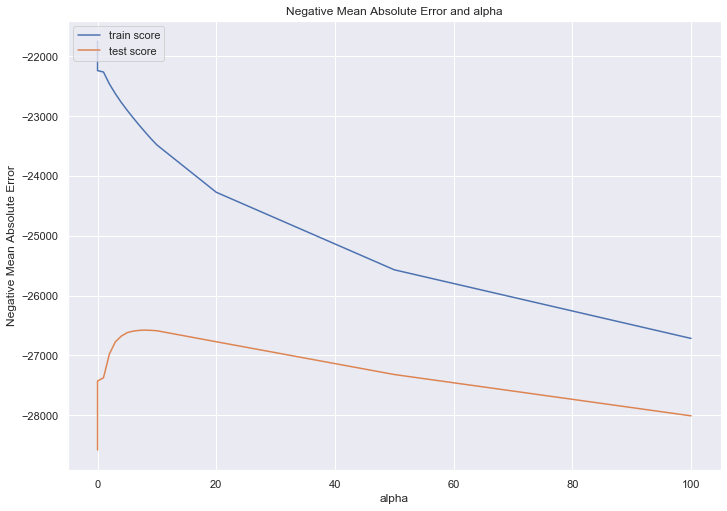

In [141]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [165]:
alpha = 0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.92603168e+02,  1.81832257e+04,  4.16482687e+03,  1.47839215e+04,
       -7.82553976e+03,  1.13881296e+04,  2.62871903e+03,  1.12378847e+03,
        3.60527311e+03,  3.42582573e+03,  2.10203620e+04,  3.09925900e+03,
        5.45664313e+03, -2.76979834e+03,  5.23680640e+04,  5.03976917e+04,
        3.90725751e+04,  4.67445699e+04,  2.97973394e+04,  1.66355256e+04,
        1.28397390e+04,  8.36267420e+02, -4.46885741e+03,  5.71735303e+03,
       -3.36293843e+04, -6.55988814e+04, -5.39357068e+03, -2.10653579e+04,
        1.69059276e+04,  4.17553127e+04,  1.71961702e+04,  5.69553230e+03,
        2.30471569e+04,  1.09138999e+03,  3.40538037e+04,  4.10194919e+03,
       -5.84995071e+03,  3.36293868e+03, -1.52822837e+04,  2.05263591e+04,
        1.11695279e+04,  2.99742541e+04,  2.12134197e+04,  8.02875106e+04,
        5.77536187e+04, -8.97604726e+03,  3.75644111e+03,  6.88044518e+03,
       -6.07115027e+01,  1.78911023e+04,  4.48533767e+04, -1.75214316e+03,
        3.07219631e+04,  

## Lasso

In [143]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   12.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [144]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.126951      0.010687         0.004724        0.006269      0.0001   
1       0.127678      0.012304         0.001719        0.003438       0.001   
2       0.131089      0.004946         0.001599        0.003199        0.01   
3       0.133285      0.003933         0.047120        0.089089        0.05   
4       0.123345      0.011019         0.001599        0.003198         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -29761.023514      -28675.626907      -27599.941486   
1   {'alpha': 0.001}      -29760.940939      -28673.227086      -27599.874488   
2    {'alpha': 0.01}      -29760.143672      -28649.229394      -27599.204531   
3    {'alpha': 0.05}      -29756.736282      -28542.595904      -27596.227435   
4     {'alpha': 0.1}      -29752.452407      -28409.315866      -27592.728143   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -27490.314860      -29304.583458    -28567.468197      903.212376   
1      -27497.263667      -29288.666414    -28565.166846      898.917017   
2      -27550.956160      -29279.481451    -28568.970858      884.316912   
3      -27539.756565      -29272.665796    -28542.786543      884.514531   
4      -27530.709228      -29265.150050    -28511.287967      886.361392   

   rank_test_score  split0_train_score  split1_train_score  \
0               26       -21814.942125       -21182.814328   
1               25       -21814.956299       -21182.814645   
2               27       -21815.138508       -21182.843702   
3               24       -21815.948561       -21183.043908   
4               23       -21816.968576       -21183.281155   

   split2_train_score  split3_train_score  split4_train_score  \
0       -21954.264681       -21984.761598       -21809.804103   
1       -21954.273715       -21984.775558       -21809.807890   
2       -21954.402036       -21984.965628       -21809.923952   
3       -21954.977599       -21985.822792       -21810.489636   
4       -21955.652723       -21986.841258       -21811.260813   

   mean_train_score  std_train_score  
0     -21749.317367       292.002854  
1     -21749.325621       292.007045  
2     -21749.454765       292.057434  
3     -21750.056499       292.258655  
4     -21750.800905       292.503519

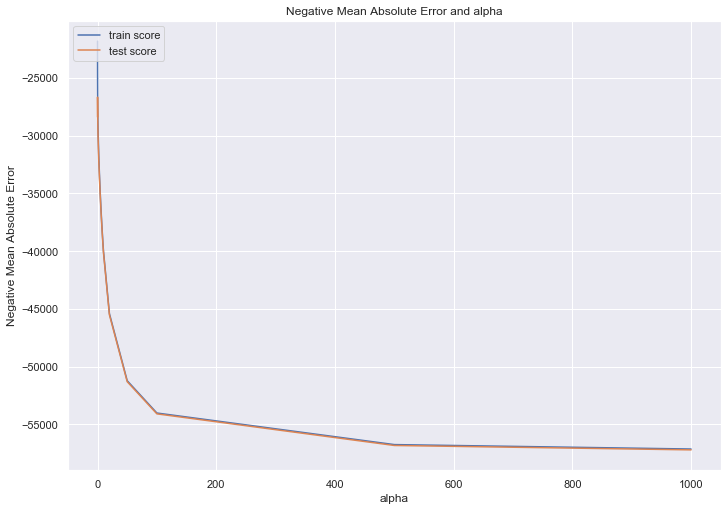

In [161]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [167]:
alpha =1

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [168]:
lasso.coef_

array([-7.42753395e+02,  1.51118385e+04,  4.48426769e+03,  1.73705156e+04,
       -9.87170723e+03,  1.13488869e+04,  2.70918017e+03,  1.55653956e+03,
        3.71291394e+03,  1.07254716e+04,  1.90511727e+04,  2.38953163e+03,
        5.41780795e+03,  7.01444693e+03,  4.02988087e+04,  5.72085404e+04,
        4.34964958e+04,  4.16260491e+04,  1.10924762e+04,  8.87858924e+03,
        5.00859098e+03,  9.90567711e+03, -3.64069737e+04,  9.84994778e+03,
       -2.00411779e+04, -2.13348685e+04, -3.62596391e+03,  5.09868529e+03,
        3.10226483e+04,  7.92934632e+03,  1.15820014e+04,  1.19962976e+03,
       -5.53554158e+02, -4.84675341e+03,  3.06741281e+04, -7.85084704e+03,
       -1.59786576e+04, -1.11059901e+04, -1.60168930e+04, -4.71236145e+03,
        3.45975337e+02,  3.23256248e+04,  1.43730406e+04,  8.47343409e+04,
        5.20499890e+04, -9.48744791e+02,  1.19778517e+04,  5.97767934e+02,
        8.51891863e+02,  2.19096257e+04,  4.98617930e+04, -1.62116173e+02,
        2.47866079e+04,  

## Elastic Net

In [163]:
elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [150]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.127939      0.005954         0.000000        0.000000      0.0001   
1       0.118699      0.009575         0.009047        0.005269       0.001   
2       0.025493      0.002303         0.003194        0.003912        0.01   
3       0.016054      0.000093         0.001585        0.003170        0.05   
4       0.009613      0.003279         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -29300.645660      -28395.676338      -27745.664447   
1   {'alpha': 0.001}      -27837.489155      -28171.326374      -27397.417115   
2    {'alpha': 0.01}      -24764.909562      -28117.362256      -26862.523274   
3    {'alpha': 0.05}      -23480.813532      -29002.672819      -27223.264893   
4     {'alpha': 0.1}      -23353.181926      -29749.802282      -27485.806135   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -27247.723550      -29306.802356    -28400.185274      823.410033   
1      -26583.523810      -28959.137032    -27789.825426      790.089038   
2      -25634.257629      -27990.281464    -26671.997143     1310.461794   
3      -25565.670205      -28646.334570    -26780.516201     2049.972971   
4      -26023.509521      -29194.857617    -27157.701575     2314.394116   

   rank_test_score  split0_train_score  split1_train_score  \
0                7       -21911.011010       -21188.794569   
1                5       -22219.405393       -21291.020970   
2                1       -23136.308953       -22041.054704   
3                2       -25059.917144       -23529.226941   
4                3       -26168.164772       -24470.086236   

   split2_train_score  split3_train_score  split4_train_score  \
0       -22031.528320       -22084.714950       -21913.245838   
1       -22230.688172       -22423.300160       -22246.967648   
2       -22817.439900       -23069.969806       -22853.956451   
3       -24348.644568       -24545.585642       -24018.254551   
4       -25275.600625       -25550.539419       -24895.944321   

   mean_train_score  std_train_score  
0     -21825.858938       325.590137  
1     -22082.276469       402.575703  
2     -22783.745963       390.865667  
3     -24300.325769       512.566824  
4     -25272.067075       577.094794

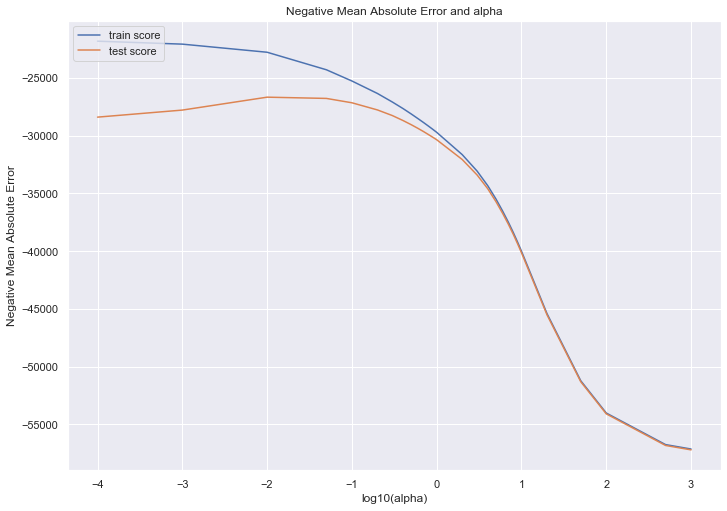

In [164]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [152]:
alpha = 0.1

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
elasticnet.coef_

array([-2.31742739e+03,  2.01218214e+04,  3.55847251e+03,  1.42865817e+04,
       -9.82163719e+03,  9.81785216e+03,  2.40406112e+03,  7.79233456e+02,
        3.32864855e+03,  3.30840752e+03,  1.99888171e+04,  3.05226773e+03,
        8.30294545e+03,  6.46372664e+03,  1.23589772e+03,  3.15188763e+03,
        7.16101977e+03, -6.57839470e+03,  1.05367704e+03,  1.74122525e+03,
        3.69074173e+03,  1.87249108e+03, -9.94959844e+02,  5.78849333e+03,
       -6.39756998e+03, -9.61631117e+02, -2.55074615e+03,  3.44451228e+03,
        2.08582231e+03, -1.52041224e+02, -1.18434945e+03,  1.02742189e+02,
        1.26029512e+03, -1.00539751e+04,  8.93946997e+03, -1.03445545e+04,
       -1.37236548e+04, -4.89422528e+03, -5.17109544e+03, -4.29257042e+03,
       -4.22141951e+03, -3.44538803e+02,  2.90423426e+03,  3.06268073e+04,
        1.43376245e+04,  1.03023051e+03,  1.82291229e+03, -4.32649076e+03,
       -3.95842329e+03,  4.10237652e+03,  5.07070303e+03, -1.13248910e+03,
        2.61208257e+03, -

## Forward Feature Selection

In [154]:
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + np.log(n) * num_params
    return bic

In [155]:
features = X_train.columns

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['ExterQual'] 
AIC:  22355.618877883182 
BIC:  22365.47595351951
Selected features:  ['ExterQual', 'FireplaceQu'] 
AIC:  22208.91893170161 
BIC:  22223.704545156103
Selected features:  ['ExterQual', 'FireplaceQu', 'KitchenQual'] 
AIC:  22088.52131622358 
BIC:  22108.23546749624
Selected features:  ['ExterQual', 'FireplaceQu', 'KitchenQual', 'BsmtQual'] 
AIC:  22021.944374400056 
BIC:  22046.58706349088
Selected features:  ['ExterQual', 'FireplaceQu', 'KitchenQual', 'BsmtQual', 'BldgType_TwnhsE'] 
AIC:  21954.135090130065 
BIC:  21983.706317039054
Selected features:  ['ExterQual', 'FireplaceQu', 'KitchenQual', 'BsmtQual', 'BldgType_TwnhsE', 'RoofStyle_Hip'] 
AIC:  21894.597494645233 
BIC:  21929.097259372385
Selected features:  ['ExterQual', 'FireplaceQu', 'KitchenQual', 'BsmtQual', 'BldgType_TwnhsE', 'RoofStyle_Hip', 'Neighborhood_StoneBr'] 
AIC:  21839.86308897144 
BIC:  21879.29139151676
Selected features:  ['ExterQual', 'FireplaceQu', 'KitchenQual', 'BsmtQual', '

In [156]:
regression.coef_

array([ 35025.09629258,  10402.64407776,  28383.82742603,  19836.53342807,
       -42974.81228495,  20163.10715345,  39341.65354928,  22816.8582529 ,
       165995.87714011,   5381.50084024])